# Support Vector Machine (SVM) Practical

This is a practical for SVM model machine learning classification model. 

The goal is to group predict customer retention base on certain characteristics of the customer such as age and income. The target vairable for which we are trying to predict is `churn` 

Before we dive into the practical, here is an overview of key steps in the practical:
* Loading the required libraries
* Data processing and exploration
* Data modelling
* Insight and model evaluation

**The data for this practical was obtained from the IBM cloud storage**.

### Loading the required libraries

In [17]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

### Reading and exploring the dataset

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Data processing and exploration

In [4]:
data = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']]
data.head(5)

,tenure,age,address,income,ed,employ,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


Now lets explore this data further

In [5]:
# Exploring the details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tenure   200 non-null    float64
 1   age      200 non-null    float64
 2   address  200 non-null    float64
 3   income   200 non-null    float64
 4   ed       200 non-null    float64
 5   employ   200 non-null    float64
 6   churn    200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


Notice from above the range of the dataset is 0 to 200, thus each feature should have 200 observation. Notice that all the features contain 200 observations. And the data type in show to be float(64) for all the features.

In [6]:
# Checking for missing values.
data.isnull().sum()

tenure     0
age        0
address    0
income     0
ed         0
employ     0
churn      0
dtype: int64

In [7]:
data.shape

(200, 7)

In [8]:
# lets see the count for each class of the target
data['churn'].value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

<Axes: >

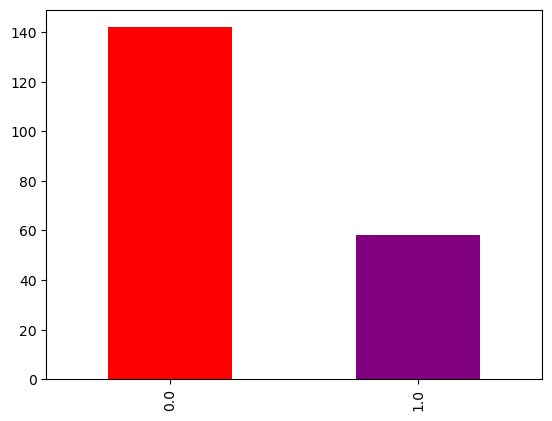

In [9]:
# We can also see the count for the target variable with a graph thus 
data.churn.value_counts().plot.bar(color=['red', 'purple'])

In [10]:
# let X contain all the features except churn
X = data.iloc[:, :-1]

In [11]:
# lets see a decription of X
X.describe()

,tenure,age,address,income,ed,employ
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000


In machine learning, the standard scaler is used to normalize features so that they have zero means and unit variance. From observation, notice that `income` have a bigger scale than all the other features. In the next lines of code I apply the standard scaler, I normalize the dataset in X, so that my machine-learning algorithm will read the features on an equal scale regardless of their distribution and magnitude.

In [14]:
# Normalizing X using the standard scaler
X= StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472]])

In [15]:
# let y equals to the target churn
y = df['churn'].values
y[0:5]

array([1., 1., 0., 0., 0.])

Now lets split the datasets into training set and testing set as shown below

In [16]:
# spliting the dataset to training and test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=10)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (160, 6) (160,)
Test set: (40, 6) (40,)


### Data modelling

The SVM model can be used with a kernel functions, that is, transfroming the data into a higher dimensional space which can take form, namely:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```
For this practical, we will look at the SVM with a kernel and with a kernel, specifically the Sigmoid.

In [18]:
# Modelling and fitting the SVM with no kernel
SVM_model = SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [19]:
# Retreiving the predicted values of y
predicted_y = SVM_model.predict(X_test)
predicted_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

### Insight and evaluation

In [55]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary',zero_division=1 )
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [54]:
# Model evaluation
evaluate_metrics(y_test, predicted_y)

{'accuracy': 0.7, 'recall': 0.0, 'precision': 1.0, 'f1score': 0.0}

Notice the high precision of 1 above might be due to the fact that we are dealing with a dataset that is imbalanced. Lets use a sigmoid fuction to see how the result of our model changes

In [48]:
# SVM model with a kernel function
SVM_model2 = SVC(kernel='sigmoid')
SVM_model2.fit(X_train, y_train) 

SVC(kernel='sigmoid')

In [49]:
# Retreiving the predicted y
predicted_y2 = SVM_model2.predict(X_test)
predicted_y2

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [50]:
# Model evaluation
evaluate_metrics(y_test, predicted_y2)

{'accuracy': 0.725,
 'recall': 0.16666666666666666,
 'precision': 0.6666666666666666,
 'f1score': 0.26666666666666666}

Notice this time we have a value for F1score and recall. 

**Note** We can go further to add a *regularization* parameter to this kernel function to further optmize the model, though this is not covered here.

## Thanks for following till the end